In [26]:
import pandas as pd
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams.update({'font.size': 16})
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
interviews = pd.read_csv('../data/Interview.csv', parse_dates=['Date of Interview'], dayfirst=True)

def clean_header(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_').str.replace(':', '_')
    return df.columns

clean_header(interviews)

interviews['observed_attendance'] = interviews['observed_attendance'].map({'Yes': 1, 'No': 0})

interviews.drop(interviews.tail(1).index,inplace=True)

#y = interviews['observed_attendance']

#X = interviews.drop(columns = ['observed_attendance'])
X = interviews
X = X.drop(columns = ['unnamed__23', 'unnamed__24', 'unnamed__25', 'unnamed__26', 'unnamed__27',])

for i in range(len(X['date_of_interview'])):
    try:
        #if type(X['date_of_interview'].iloc[i] == str):
        X['date_of_interview'].iloc[i] = X['date_of_interview'].iloc[i].replace('.', '/')
    except:
        pass
    
X['date_of_interview']= pd.to_datetime(X['date_of_interview'], dayfirst=True, errors='coerce')
X['year'] = pd.DatetimeIndex(X['date_of_interview']).year
X['month'] = pd.DatetimeIndex(X['date_of_interview']).month
X['day'] = pd.DatetimeIndex(X['date_of_interview']).day
X['day_of_week'] = pd.DatetimeIndex(X['date_of_interview']).dayofweek
X = X.drop(columns = ['date_of_interview' , 'year', 'day'])

/home/alec/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
X['can_i_call_you_three_hours_before_the_interview_and_follow_up_on_your_attendance_for_the_interview'] = X['can_i_call_you_three_hours_before_the_interview_and_follow_up_on_your_attendance_for_the_interview'].map({'Yes': 1, 'No': 0})
X['can_i_have_an_alternative_number/_desk_number__i_assure_you_that_i_will_not_trouble_you_too_much'] = X['can_i_have_an_alternative_number/_desk_number__i_assure_you_that_i_will_not_trouble_you_too_much'].map({'Yes': 1, 'No': 0})
X['have_you_taken_a_printout_of_your_updated_resume__have_you_read_the_jd_and_understood_the_same'] = X['have_you_taken_a_printout_of_your_updated_resume__have_you_read_the_jd_and_understood_the_same'].map({'Yes': 1, 'No': 0})
X['are_you_clear_with_the_venue_details_and_the_landmark_'] = X['are_you_clear_with_the_venue_details_and_the_landmark_'].map({'Yes': 1, 'No': 0})
X['has_the_call_letter_been_shared'] = X['has_the_call_letter_been_shared'].map({'Yes': 1, 'No': 0})
X['have_you_obtained_the_necessary_permission_to_start_at_the_required_time'] = X['have_you_obtained_the_necessary_permission_to_start_at_the_required_time'].map({'Yes': 1, 'No': 0})
X['hope_there_will_be_no_unscheduled_meetings'] = X['hope_there_will_be_no_unscheduled_meetings'].map({'Yes': 1, 'No': 0})
X['expected_attendance'] = X['expected_attendance'].map({'Yes': 1, 'yes': 1 , 'Uncertain': 1, 'No': 0, 'NO': 0, '11:00 AM': 1, '10.30 Am': 1})

X['num_of_questions_answered'] = X['can_i_call_you_three_hours_before_the_interview_and_follow_up_on_your_attendance_for_the_interview']+ X['can_i_have_an_alternative_number/_desk_number__i_assure_you_that_i_will_not_trouble_you_too_much']+ X['have_you_taken_a_printout_of_your_updated_resume__have_you_read_the_jd_and_understood_the_same'] + X['are_you_clear_with_the_venue_details_and_the_landmark_']+ X['has_the_call_letter_been_shared'] + X['have_you_obtained_the_necessary_permission_to_start_at_the_required_time'] + X['hope_there_will_be_no_unscheduled_meetings']

X = X.drop(columns = ['can_i_call_you_three_hours_before_the_interview_and_follow_up_on_your_attendance_for_the_interview', 'can_i_have_an_alternative_number/_desk_number__i_assure_you_that_i_will_not_trouble_you_too_much', 'have_you_taken_a_printout_of_your_updated_resume__have_you_read_the_jd_and_understood_the_same', 'are_you_clear_with_the_venue_details_and_the_landmark_', 'has_the_call_letter_been_shared', 'have_you_obtained_the_necessary_permission_to_start_at_the_required_time', 'hope_there_will_be_no_unscheduled_meetings'])

In [7]:
X['marital_status'] = X['marital_status'].map({'Married': 1, 'Single': 0})
X['gender'] = X['gender'].map({'Male': 1, 'Female': 0})
X['interview_type'] = X['interview_type'].map({'Scheduled Walkin': 1, 'Scheduled': 1, 'Walkin ': 0, 'Scheduled Walk In': 1, 'Sceduled walkin': 1, 'Walkin': 0, 'Scheduled ': 1})
X = X.drop(columns = ['gender' , 'marital_status', 'interview_type', 'nature_of_skillset', 'candidate_native_location', 'namecand_id'])
X = X.replace(to_replace = 'IT Products and Services', value = 'IT')
X = X.replace(to_replace = 'IT Services', value = 'IT')
X = X.replace(to_replace = 'chennai', value = 'Chennai')
X = X.replace(to_replace = 'CHENNAI', value = 'Chennai')
X = X.replace(to_replace = 'chennai ', value = 'Chennai')
X = X.replace(to_replace = '- Cochin- ', value = 'Cochin')

#X['candidate_location_same'] = ""
#for i in range(len(X['candidate_current_location'])):
    #if X['candidate_current_location'].iloc[i] == X['candidate_job_location'].iloc[i]:
        #X['candidate_location_same'].iloc[i] = 1
    #else:
        #X['candidate_location_same'].iloc[i] = 0

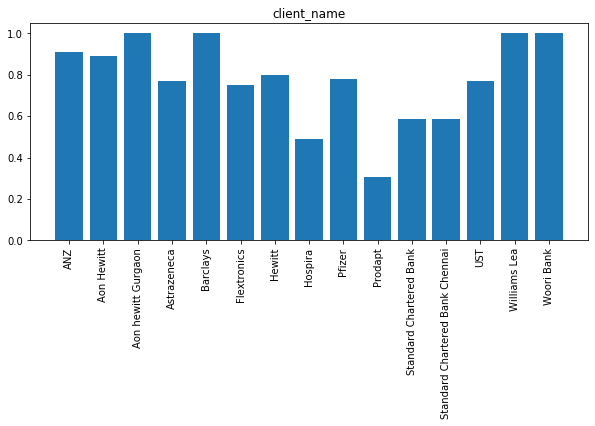

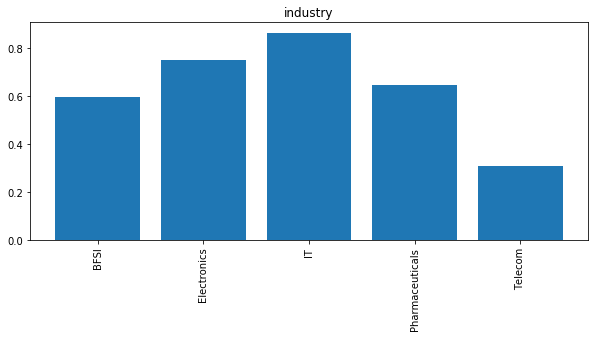

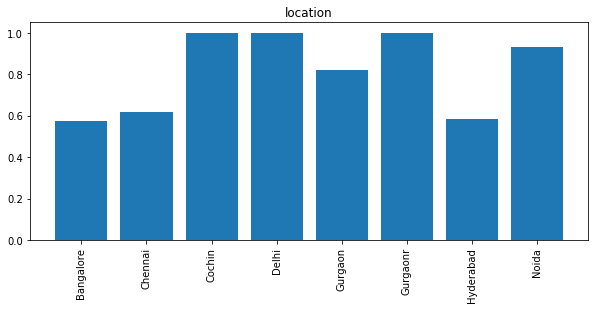

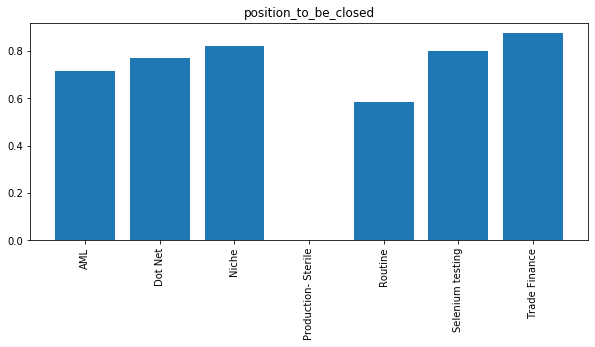

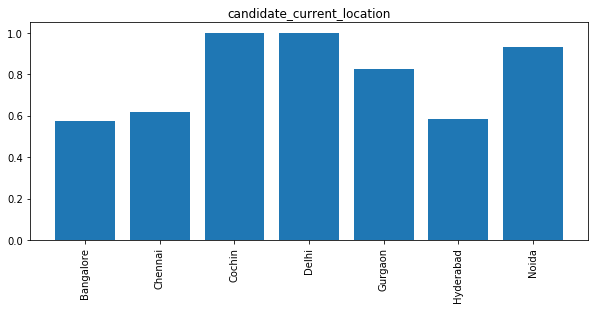

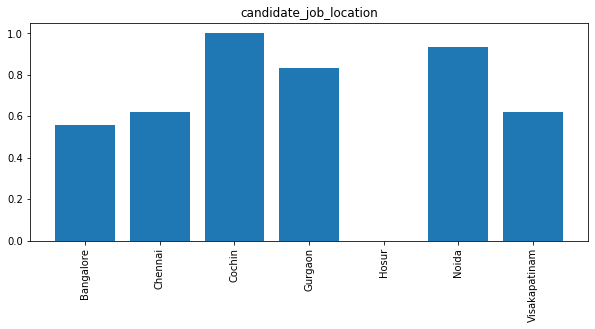

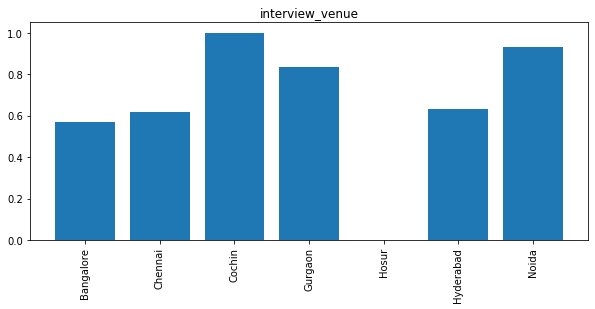

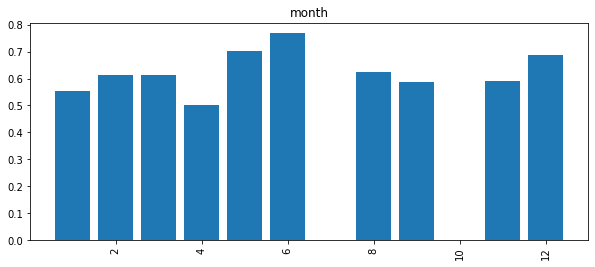

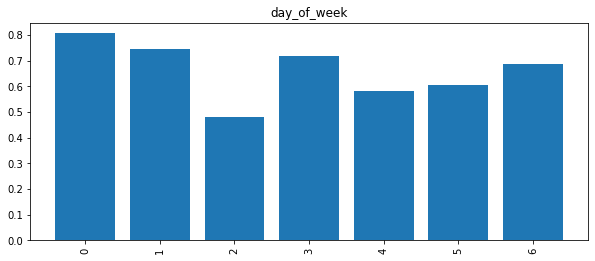

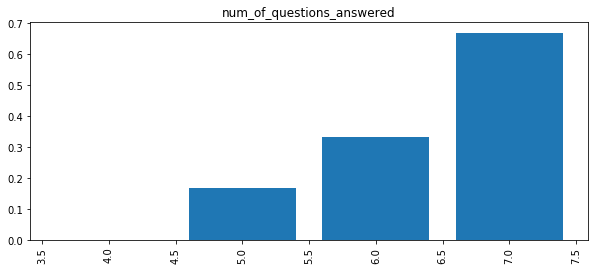

In [8]:
def my_plot(col):
    test = X.groupby([col]).sum()
    xyz = test['observed_attendance']/test['expected_attendance']
    fig, ax = plt.subplots(figsize = (10,4))
    ax.bar(list(xyz.index) , xyz)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(col)
    plt.show()

headers = ['client_name',
 'industry',
 'location',
 'position_to_be_closed',
 #'nature_of_skillset',
 #'interview_type',
 #'gender',
 'candidate_current_location',
 'candidate_job_location',
 'interview_venue',
 #'candidate_native_location',
 #'marital_status',
 'month',
 'day_of_week',
 'num_of_questions_answered']
for i in headers:
    my_plot(i)

In [9]:
X

,client_name,industry,location,position_to_be_closed,candidate_current_location,candidate_job_location,interview_venue,expected_attendance,observed_attendance,month,day_of_week,num_of_questions_answered
0,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Chennai,Hosur,Hosur,1.0,0.0,2.0,4.0,7.0
1,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Chennai,Bangalore,Hosur,1.0,0.0,2.0,4.0,7.0
2,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Chennai,Chennai,Hosur,1.0,0.0,2.0,4.0,NaN
3,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Chennai,Chennai,Hosur,1.0,0.0,2.0,4.0,5.0
4,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Chennai,Bangalore,Hosur,1.0,0.0,2.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,Pfizer,Pharmaceuticals,Chennai,Niche,Chennai,Chennai,Chennai,1.0,1.0,5.0,5.0,7.0
1229,Pfizer,Pharmaceuticals,Chennai,Niche,Chennai,Chennai,Chennai,1.0,1.0,5.0,5.0,7.0
1230,Pfizer,Pharmaceuticals,Chennai,Niche,Chennai,Chennai,Chennai,1.0,1.0,5.0,4.0,7.0
1231,Pfizer,Pharmaceuticals,Chennai,Niche,Chennai,Chennai,Chennai,1.0,1.0,5.0,4.0,7.0


In [10]:
X['num_of_questions_answered'] = X['num_of_questions_answered'].fillna(0)
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1232
Data columns (total 12 columns):
client_name                   1079 non-null object
industry                      1079 non-null object
location                      1079 non-null object
position_to_be_closed         1079 non-null object
candidate_current_location    1079 non-null object
candidate_job_location        1079 non-null object
interview_venue               1079 non-null object
expected_attendance           1079 non-null float64
observed_attendance           1079 non-null float64
month                         1079 non-null float64
day_of_week                   1079 non-null float64
num_of_questions_answered     1079 non-null float64
dtypes: float64(5), object(7)
memory usage: 109.6+ KB


In [11]:
X = pd.get_dummies(X)

y = X['observed_attendance']
X = X.drop(columns = ['observed_attendance', 'expected_attendance'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,month,day_of_week,num_of_questions_answered,client_name_ANZ,client_name_Aon Hewitt,client_name_Aon hewitt Gurgaon,client_name_Astrazeneca,client_name_Barclays,client_name_Flextronics,client_name_Hewitt,...,candidate_job_location_Hosur,candidate_job_location_Noida,candidate_job_location_Visakapatinam,interview_venue_Bangalore,interview_venue_Chennai,interview_venue_Cochin,interview_venue_Gurgaon,interview_venue_Hosur,interview_venue_Hyderabad,interview_venue_Noida
996,5.0,0.0,7.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
739,2.0,5.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
755,2.0,5.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1002,5.0,0.0,0.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
702,2.0,5.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
random_forest_grid = {'max_depth': [3, None],
                        'max_features': ['sqrt', 'log2', None],
                        'min_samples_split': [2, 4],
                        'min_samples_leaf': [1, 2, 4],
                        'bootstrap': [True, False],
                        'n_estimators': [10, 20, 40, 80],
                        'random_state': [1]}

model_gridsearch = GridSearchCV(RandomForestClassifier(),
                                    random_forest_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='neg_mean_squared_error')

In [14]:
model_gridsearch.fit(X_train, y_train)
best_params = model_gridsearch.best_params_ 
model_best = model_gridsearch.best_estimator_
model_best.score(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   15.0s finished


0.7381228273464658

In [15]:
model_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [16]:
best_params

{'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80,
 'random_state': 1}

In [29]:
y_preds = model_best.predict(X_test)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
accuracy = accuracy_score(y_test, y_preds)
print(precision, recall, accuracy)

0.7530864197530864 0.8531468531468531 0.7175925925925926


In [17]:
    #Feature Importance
    importances = model_best.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model_best.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    print('------------------------------')
    print('Feature headers:')

    headers = list(X.columns.values)
    for idx, val in enumerate(headers):
        print(f'feature {idx}:', val)

    # Plot the feature importances of the forest
    #plt.figure(figsize = (12,7))
    #plt.title("Feature importances", size=24)
    #plt.bar(range(X.shape[1]), importances[indices],
           #color="r", yerr=std[indices], align="center")
    #plt.xticks(range(X.shape[1]), headers, rotation=45)
    #plt.xlim([-1, X.shape[1]])
    #plt.savefig('feature_importance.png')
    #plt.show()

Feature ranking:
1. feature 2 (0.374838)
2. feature 1 (0.140226)
3. feature 0 (0.124635)
4. feature 33 (0.074410)
5. feature 35 (0.026537)
6. feature 20 (0.025997)
7. feature 18 (0.021265)
8. feature 10 (0.018012)
9. feature 12 (0.017600)
10. feature 13 (0.016633)
11. feature 51 (0.013665)
12. feature 45 (0.011235)
13. feature 22 (0.010651)
14. feature 57 (0.009775)
15. feature 24 (0.008804)
16. feature 11 (0.008650)
17. feature 52 (0.008467)
18. feature 6 (0.006896)
19. feature 23 (0.006870)
20. feature 38 (0.006676)
21. feature 29 (0.006433)
22. feature 43 (0.005966)
23. feature 39 (0.005665)
24. feature 34 (0.005356)
25. feature 46 (0.005078)
26. feature 14 (0.004554)
27. feature 56 (0.004347)
28. feature 21 (0.004224)
29. feature 53 (0.004122)
30. feature 37 (0.004033)
31. feature 9 (0.003211)
32. feature 31 (0.003009)
33. feature 44 (0.001411)
34. feature 8 (0.001374)
35. feature 19 (0.001262)
36. feature 55 (0.000903)
37. feature 4 (0.000894)
38. feature 30 (0.000779)
39. feature